<a href="https://colab.research.google.com/github/gehad-Ahmed30/Deep-Learning/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep learning Libs:**

1. Tensorflow ( Google )
2. Pytorch  ( Facebook )
3. Keras
4. Caffe
5. JAX ( JavaScript )
6. CNTK
7. ONNX
8. FastAI

**We will be Using Tensroflow, why?**

1. Easy to integrate ( mobile app, web application, embedded system )
2. Could be converted to multiple formats ( tflite -to work on smartphones, tfjs )
3. Work in the background using C++
4. Open source, frequently updated by Google, Customizable


**Keras** <br>
an interface ( enable us to write simpler code ), work as a wrapper: tf, pytorch, CNTK

**Activation functions**

1. Sigmoid
2. Relu
3. Tanh
4. Softmax
5. Leaky Relu  

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

![image info](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
total_pixels=32*32*3
total_pixels

3072

Here we see there are 50000 training images and 1000 test images

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])

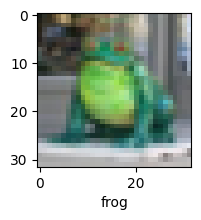

In [13]:
plot_sample(x_train,y_train,19)

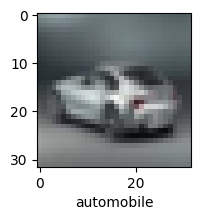

In [14]:
plot_sample(x_train,y_train,250)

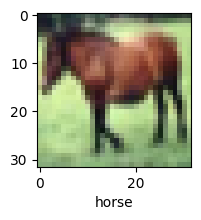

In [16]:
plot_sample(x_train, y_train, 7)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [17]:
x_train=x_train/250
x_test=x_test/250

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [20]:
newann = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
)

In [21]:
newann.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
newann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2715 - loss: 2.2288
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3914 - loss: 1.6868
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4327 - loss: 1.5842
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4496 - loss: 1.5300
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4696 - loss: 1.4912
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4782 - loss: 1.4571
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4884 - loss: 1.4320
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4973 - loss: 1.4051
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5111 - loss: 1.3686
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5111 - loss: 1.3662


In [23]:
newann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4593 - loss: 1.4959


[1.4955196380615234, 0.4634999930858612]

In [24]:
results=newann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [25]:
results[0]

array([4.6481255e-02, 1.0965351e-03, 1.7430721e-02, 4.8623478e-01,
       1.6485989e-01, 2.6955611e-01, 4.1991877e-03, 6.2525598e-04,
       9.2347693e-03, 2.8137819e-04], dtype=float32)

In [26]:
sum(results[0])

0.9999998827988748

In [27]:
modelprediction=np.argmax(results[0])
modelprediction

3

In [28]:
actual_value=y_test[0][0]
actual_value

3

In [29]:
newann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
newann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5489 - loss: 1.2569
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5643 - loss: 1.2205
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5679 - loss: 1.2131
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5765 - loss: 1.1922
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5728 - loss: 1.2006
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5751 - loss: 1.1893
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5761 - loss: 1.1831
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5750 - loss: 1.1824
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5805 - loss: 1.1723
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5814 - loss: 1.1736


In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = newann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.56      0.59      1000
           1       0.59      0.67      0.62      1000
           2       0.38      0.42      0.40      1000
           3       0.34      0.34      0.34      1000
           4       0.45      0.35      0.40      1000
           5       0.44      0.36      0.40      1000
           6       0.46      0.64      0.54      1000
           7       0.58      0.52      0.55      1000
           8       0.61      0.69      0.65      1000
           9       0.61      0.50      0.55      1000

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.50     10000
weighted avg       0.51      0.51      0.50     10000



**Optimizers:** <br>
adam, adamax, gd, sgd, rms prop

**Loss**
<br>
called error function ( calculate error value )
<br>goal : loss ≈ 0

<br>

**HyperParameters**

1. Number of neuron in the hidden layer
2. Number of hidden layers
3. Number of epochs
1. Batch Size
2. Steps Per Epoch
3. Early Stop
4. Learning Rate



**Differ from problem to another:**
<br>
1. Classification ( binary classification, multi classification )                            
2. Regression                                    
3. Clustering  